# Innomatics Research Lab Hackathon 

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("dataframe_.csv")

In [3]:
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


As we can see the data has Two columns as Output and Input.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


The data has 1696 Entries and all the entries are of floating type i.e non-integer

In [5]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [6]:
data.shape

(1697, 2)

In [7]:
input_count = data["input"].value_counts()
input_count

-125.366669    11
 112.633331    10
-131.366669     8
-119.366669     8
 80.633331      7
               ..
-14.879573      1
-7.366669       1
 0.106496       1
 0.641190       1
-110.344221     1
Name: input, Length: 991, dtype: int64

# Data Visualization

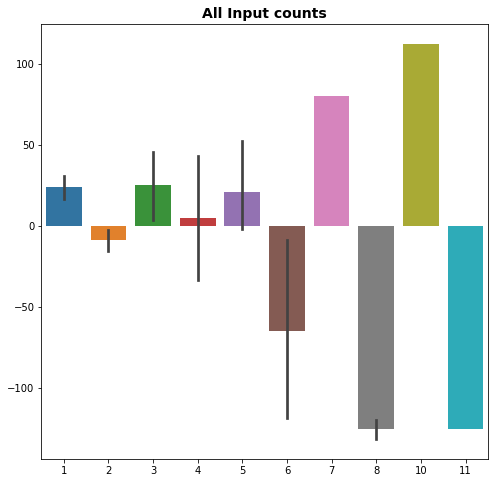

In [8]:
# Visualize it through a bar chart
plt.figure(figsize=(8,8))
sns.barplot(x=input_count.values, y=input_count.index)
plt.title("All Input counts", fontsize=14, fontweight="heavy")
plt.show()

As we can see here as the input counts are increasing the value of the particular entry also increases 
For Eg:- The highest input value is 125.366669 which also has the highest number of Counts in it.
          And on the other hand the value-110.344221 has the lowest count in the dataset.

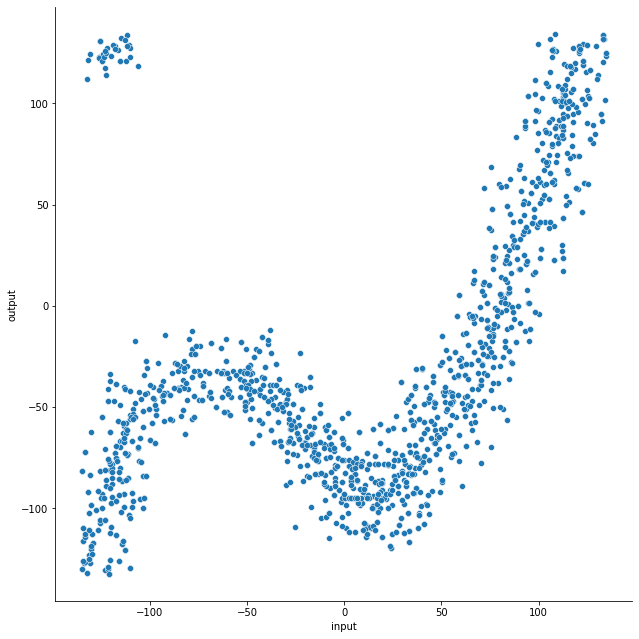

In [9]:
sns.pairplot(data,x_vars=['input'], y_vars='output',height=9)
plt.show()

-As we Can see in the above plot that the values of input and output are distributed in a wavy format i.e the values are firstly started below the x-axis with the negative values and then increased upto 0 and then again decreased till -130 and then incresed till the end value.

-The plot also has two bounds at 0 and -100 approx.

-The plot also has some outliers which range above 100 in output and -100 in input.



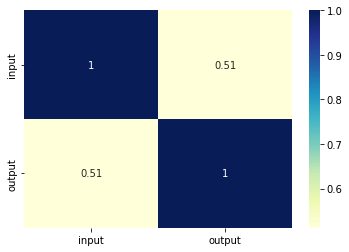

In [10]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

By analyzing the heat map we can conclude that input and output has 0.51 degree of linear relationship

# Data Cleaning

In [11]:
data['input'].skew()

-0.20318515325323347

In [12]:
data['output'].skew()

1.0573226471779904

As we can see here the input variable is left tailed whereas output variable is right tailed

In [13]:
data['input'].describe()

count    1696.000000
mean        1.159933
std        79.005970
min      -134.962839
25%       -63.386506
50%        10.195194
75%        70.264109
max       134.605775
Name: input, dtype: float64

In [14]:
data['output'].describe()

count    1696.000000
mean      -34.088017
std        65.771112
min      -132.422167
25%       -80.026767
50%       -50.470981
75%       -11.000000
max       134.425495
Name: output, dtype: float64

In [15]:
data.isna().any()

input     True
output    True
dtype: bool

We can see that there are nan values in the dataset.

In [16]:
data.isnull().any()

input     True
output    True
dtype: bool

In [17]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
data.dropna(inplace=True)

Here We have removed all the null and infinite values which will be a threat for accurate score.

# Model Building

In [19]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [20]:
# Putting feature variable to X
X = data.iloc[:,0:1]

# Putting response variable to y
y = data.iloc[:,1]

In [21]:
X.head()

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781


In [22]:
y.head()

0   -130.572085
1   -129.938929
2   -130.141832
3   -125.760932
4   -112.785214
Name: output, dtype: float64

In [23]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1187, 1)
(509, 1)
(1187,)
(509,)


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
def clean_dataset(X_train):
    assert isinstance(X_train, pd.DataFrame)
    X_train.dropna(inplace=True)
    indices_to_keep = ~X_train.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return X_train[indices_to_keep].astype(np.float64)

In [28]:
# fit the model to the training data
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
lm.coef_

array([0.40128087])

In [30]:
lm.score(X_test, y_test)

0.30135190753182073

In [31]:
y_pred = lm.predict(X_test)
y_pred

array([-84.50290891, -34.21391637,  -4.97607982, -56.38158407,
       -60.14363222, -42.26664457, -37.1614574 ,  12.73594565,
       -66.56608231, -14.95243451,   0.64806645, -39.44071929,
       -33.35374725,   0.6748034 ,  -1.71016574, -31.08114272,
       -55.24104953, -19.3665241 , -26.71119186, -42.723406  ,
         6.68358461, -76.99157496, -22.17549021, -31.65581351,
       -14.55115364, -49.10755398, -39.69796259, -19.68139994,
       -79.88352912, -39.83184857,  -2.09319   , -34.21536191,
       -34.8166902 ,   7.92057519,   0.22076516, -25.41228492,
       -85.57786797, -40.61053613, -55.67671447, -40.40221369,
         1.29459222, -47.62964159, -12.71592918,  10.72954129,
         7.29785806, -54.60784108, -76.81416403, -32.98658237,
       -84.98508519,   9.92697955, -37.56541611,  13.53850739,
       -14.86339062, -53.1971448 , -17.08610258, -56.17274832,
       -52.21885487,   5.91417083, -12.14346841,   6.65630019,
         8.96477924, -21.37292846, -80.41652723, -16.05

In [32]:
from sklearn import metrics

MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [33]:
RMSE

57.16275875552226

In [34]:
MAE

43.668407924371735

In [35]:
MSE

3267.580988542037

Here From linear regression model we have got a RMSE score of 57.16 which is root mean squred error.